# Visualizando e manipulando dados de tabelas FITS

## Autores
Lia Corrales, Kris Stern

## Tradução
Lethycia Carvalho

## Objetivos de Aprendizagem
* Descarregar um arquivo de tabela FITS de um endereço da web;
* Abrir um arquivo de tabela FITS e visualizar seu conteúdo;
* Produzir um histograma 2D com os dados da tabela;
* Fechar o arquivo FITS após o uso.

## Palavras-chave
FITS, arquivo de entrada/saída, tabela, numpy, matplotlib, histograma.


## Sumário

Este tutorial demonstra o uso do `astropy.utils.data` para descarregar um arquivo de dados de um endereço da web, e de `astropy.io.fits` and `astropy.table` para abrir o arquivo. Também demonstra como usar o `matplotlib` para visualizar estes dados em um histograma.

In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm

# Configurar matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

A linha seguinte é necessária para descarregarmos os arquivos FITS que serão usados de exemplo neste tutorial.

In [2]:
from astropy.utils.data import download_file

Arquivos FITS, geralmente, contêm grandes quantidades de tabelas e dados multidimensionais.

Neste exemplo particular, abriremos um arquivo FITS de uma observação do Centro Galáctico realizada pelo Chandra. O arquivo contém uma lista de eventos (EVENTS) com coordenadas x e y, energia e várias outras informações.

In [3]:
event_filename = download_file('http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits', 
                               cache=True)

## Abrindo o arquivo FITS e visualizando o conteúdo da tabela

Já que o arquivo é grande, vamos abri-lo com o `memmap=True` para previnir problemas com o armazenamento da RAM.

In [4]:
hdu_list = fits.open(event_filename, memmap=True)

In [5]:
hdu_list.info()

Filename: /root/.astropy/cache/download/url/333246bccb141ea3b4e86c49e45bf8d6/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


Nesse caso, estamos interessados em ler a tabela EVENTS, que contém informações sobre cada fóton de raios-X que atingiu o detector.

Para descobrirmos quais informações a tabela EVENTS contém, vamos imprimir os nomes das suas colunas.

In [6]:
print(hdu_list[1].columns)

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

Agora, converteremos estes dados em uma [tabela do astropy](http://docs.astropy.org/en/stable/table/). Embora seja possível acessar tabelas FITS diretamente com ``.data``, o uso de [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table) tende a tornar uma variedade de tarefas comuns mais convenientes.

In [7]:
evt_data = Table(hdu_list[1].data)

Por exemplo, uma pré-visualização da tabela é facilmente obtida executando uma célula simples com o nome da tabela, definido na última linha:

In [8]:
evt_data

time,ccd_id,node_id,expno,chipx,chipy,tdetx,tdety,detx,dety,x,y,pha,pha_ro,energy,pi,fltgrade,grade,status [32]
float64,int16,int16,int32,int16,int16,int16,int16,float32,float32,float32,float32,int32,int32,float32,int32,int16,int16,bool
238623220.9093583,3,3,68,920,8,5124,3981,5095.641,4138.995,4168.0723,5087.772,3548,3534,13874.715,951,16,4,False .. False
238623220.9093583,3,1,68,437,237,4895,3498,4865.567,4621.1826,3662.1968,4915.9336,667,629,2621.1938,180,64,2,False .. False
238623220.9093583,3,2,68,719,289,4843,3780,4814.835,4340.254,3935.2207,4832.552,3033,2875,12119.018,831,8,3,False .. False
238623220.9093583,3,0,68,103,295,4837,3164,4807.3643,4954.385,3324.4644,4897.2754,831,773,3253.0364,223,0,0,False .. False
238623220.9093583,3,1,68,498,314,4818,3559,4788.987,4560.3276,3713.6343,4832.735,3612,3439,14214.382,974,64,2,False .. False
238623220.9093583,3,3,68,791,469,4663,3852,4635.4526,4268.053,3985.8496,4645.93,500,438,1952.7239,134,0,0,False .. False
238623220.9093583,3,3,68,894,839,4293,3955,4266.642,4165.3203,4044.5469,4267.605,835,713,3267.5334,224,0,0,False .. False
238623220.9093583,3,3,68,857,941,4191,3918,4164.815,4202.2256,3995.9353,4170.818,975,804,3817.0366,262,0,0,False .. False
238623220.9093583,3,3,68,910,959,4173,3971,4146.9937,4149.364,4046.3376,4146.9106,576,446,2252.7295,155,0,0,False .. False


Podemos extrair dados da tabela referenciando o nome da coluna. Vamos tentar fazer um histograma para a energia de cada fóton, o que vai nos dar uma noção do espectro (dobrado com a eficiência do detector).

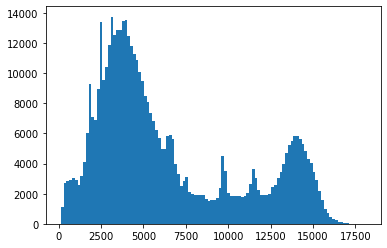

In [9]:
energy_hist = plt.hist(evt_data['energy'], bins='auto')

## Construindo um histograma 2D com alguns dados da tabela

Construiremos uma imagem agrupando as coordenadas x e y dos eventos em um histograma 2D.

Esta observação particular abrange cinco chips CCD. Primeiro, nós determinamos os eventos que ocorreram apenas nos chips principais (ACIS-I), que possuem ids de número 0, 1, 2 e 3.

In [10]:
ii = np.in1d(evt_data['ccd_id'], [0, 1, 2, 3])
np.sum(ii)

434858

### Método 1: Use numpy para fazer um histograma 2D e imshow para exibi-lo

Este método nos permite criar uma imagem sem alongamento:

Text(0, 0.5, 'y')

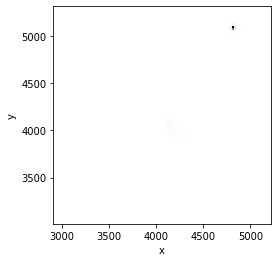

In [11]:
NBINS = (100,100)

img_zero, yedges, xedges = np.histogram2d(evt_data['x'][ii], evt_data['y'][ii], NBINS)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(img_zero, extent=extent, interpolation='nearest', cmap='gist_yarg', origin='lower')

plt.xlabel('x')
plt.ylabel('y')

# Para ver mais mapas de cores
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

### Método 2: Use hist2d com um esquema de cores log-normal

Text(0, 0.5, 'y')

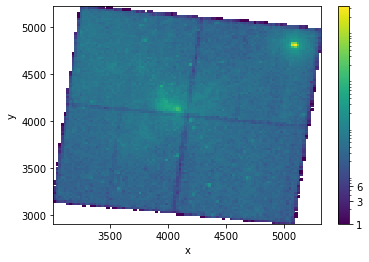

In [12]:
NBINS = (100,100)
img_zero_mpl = plt.hist2d(evt_data['x'][ii], evt_data['y'][ii], NBINS, 
                          cmap='viridis', norm=LogNorm())

cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
cbar.ax.set_yticklabels(['1','3','6'])

plt.xlabel('x')
plt.ylabel('y')

## Fechando o arquivo FITS

Quando terminar de usar um arquivo FITS, geralmente é uma boa ideia fechá-lo. Dessa forma você pode ter certeza de que não continuará usando memória em excesso ou identificadores de arquivo em seu computador. (Isso acontece automaticamente quando você fecha o Python, mas você nunca sabe quanto tempo isso pode durar ...)

In [13]:
hdu_list.close()

## Exercícios

Faça um gráfico de dispersão dos mesmos dados do histograma acima. A função [plt.scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) é sua amiga para isso. Quais são os prós e os contras de fazê-lo desta maneira?

Tente o mesmo com a função de plotagem [plt.hexbin](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hexbin). Qual parece melhor para este tipo de dados?

Escolha uma faixa de energia para fazer uma fatia da tabela FITS e, a seguir, plote-a. Como a imagem muda com diferentes faixas de energia?